In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Load the dataset
df = pd.read_csv('new_multi_site_factory_ccaaS_data.csv')
df.head()

,Date,Site_ID,Latitude,Longitude,CO2_Captured_Tons,Operational_Costs,Energy_Consumption,Revenue_CO2_Sales,Revenue_Carbon_Credits,Plant_Uptime_Percentage,Customer_Satisfaction_Score
0,2022-01-01,Site_2,43.1288,143.8017,426.59,2054.49,4660.83,1250.99,822.70,87.51,5
1,2022-01-02,Site_1,26.4692,-89.5440,NaN,3782.28,3793.76,NaN,618.78,89.09,6
2,2022-01-02,Site_1,73.7448,-11.1432,336.30,NaN,6523.91,1964.15,786.42,85.25,7
3,2022-01-06,Site_1,-75.6948,114.4794,339.17,2443.79,2966.91,1467.44,335.44,81.95,10
4,2022-01-10,Site_4,0.5064,42.2252,219.77,NaN,6126.73,1159.69,621.52,85.22,7


# 1. Data Cleaning and Preparation: Handling Missing Values

In [54]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
Date                           0
Site_ID                        0
Latitude                       0
Longitude                      0
CO2_Captured_Tons              0
Operational_Costs              0
Energy_Consumption             0
Revenue_CO2_Sales              0
Revenue_Carbon_Credits         0
Plant_Uptime_Percentage        0
Customer_Satisfaction_Score    0
Net_Profit                     0
ROI                            0
Profit_Margin                  0
dtype: int64


In [19]:
# Verify data types
print("\nData types after cleaning:")
print(df.dtypes)


Data types after cleaning:
Date                            object
Site_ID                         object
Latitude                       float64
Longitude                      float64
CO2_Captured_Tons              float64
Operational_Costs              float64
Energy_Consumption             float64
Revenue_CO2_Sales              float64
Revenue_Carbon_Credits         float64
Plant_Uptime_Percentage        float64
Customer_Satisfaction_Score      int64
dtype: object


In [24]:
numerical_cols = ['Latitude','Longitude','CO2_Captured_Tons', 'Operational_Costs', 'Energy_Consumption', 
                  'Revenue_CO2_Sales', 'Revenue_Carbon_Credits', 'Plant_Uptime_Percentage']


# Fill missing values with mean for numerical columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Re-check for missing values after filling
missing_values_after_fill = df.isnull().sum()
print("Missing values after filling:")
print(missing_values_after_fill)


Missing values after filling:
Date                           0
Site_ID                        0
Latitude                       0
Longitude                      0
CO2_Captured_Tons              0
Operational_Costs              0
Energy_Consumption             0
Revenue_CO2_Sales              0
Revenue_Carbon_Credits         0
Plant_Uptime_Percentage        0
Customer_Satisfaction_Score    0
dtype: int64


C:\Users\Kusal\AppData\Local\Temp\ipykernel_75672\2885064289.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


 # 2. Descriptive Statistics

In [25]:
# Check for outliers in numerical columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
    print(f"Number of outliers in {col}: {outliers.sum()}")

Number of outliers in Latitude: 0
Number of outliers in Longitude: 0
Number of outliers in CO2_Captured_Tons: 0
Number of outliers in Operational_Costs: 0
Number of outliers in Energy_Consumption: 0
Number of outliers in Revenue_CO2_Sales: 0
Number of outliers in Revenue_Carbon_Credits: 0
Number of outliers in Plant_Uptime_Percentage: 0


In [26]:
# Summary statistics for the dataset, segmented by site
summary_stats = df.groupby('Site_ID').describe()
print(summary_stats)


        Latitude                                                             \
           count      mean        std      min       25%      50%       75%   
Site_ID                                                                       
Site_1     121.0  3.381324  51.161437 -87.9659 -34.61820   1.4103  51.43540   
Site_2     131.0 -0.504656  52.231542 -89.6022 -47.05575   0.7255  41.66735   
Site_3     125.0 -7.250316  54.393185 -88.9654 -56.34490 -17.2543  43.90310   
Site_4     123.0 -2.209270  53.681375 -85.5594 -52.40250  -1.4673  45.37275   

                 Longitude             ... Plant_Uptime_Percentage         \
             max     count       mean  ...                     75%    max   
Site_ID                                ...                                  
Site_1   88.4911     121.0  -0.564433  ...                  93.550  99.70   
Site_2   88.9155     131.0  -0.157992  ...                  93.820  99.68   
Site_3   89.7229     125.0 -10.314472  ...                  9

In [27]:
# Variance and standard deviation
print("\nVariance:")
print(df[numerical_cols].var())



Variance:
Latitude                   2.794359e+03
Longitude                  1.064506e+04
CO2_Captured_Tons          1.142121e+04
Operational_Costs          1.035330e+06
Energy_Consumption         4.658458e+06
Revenue_CO2_Sales          2.840435e+05
Revenue_Carbon_Credits     4.489123e+04
Plant_Uptime_Percentage    2.825851e+01
dtype: float64


In [28]:
# Skewness and kurtosis
print("\nSkewness:")
print(df[numerical_cols].skew())
print("\nKurtosis:")
print(df[numerical_cols].kurt())



Skewness:
Latitude                   0.026835
Longitude                  0.033761
CO2_Captured_Tons         -0.025807
Operational_Costs          0.032096
Energy_Consumption         0.077833
Revenue_CO2_Sales         -0.051771
Revenue_Carbon_Credits     0.002067
Plant_Uptime_Percentage    0.139941
dtype: float64

Kurtosis:
Latitude                  -1.273321
Longitude                 -1.196142
CO2_Captured_Tons         -0.907795
Operational_Costs         -1.049807
Energy_Consumption        -0.990239
Revenue_CO2_Sales         -1.060425
Revenue_Carbon_Credits    -1.061116
Plant_Uptime_Percentage   -0.947052
dtype: float64


In [29]:
 #Frequency counts for categorical data (example: Site_ID)
print("\nFrequency counts for Site_ID:")
print(df['Site_ID'].value_counts())


Frequency counts for Site_ID:
Site_ID
Site_2    131
Site_3    125
Site_4    123
Site_1    121
Name: count, dtype: int64


 # 3. Distribution Analysis

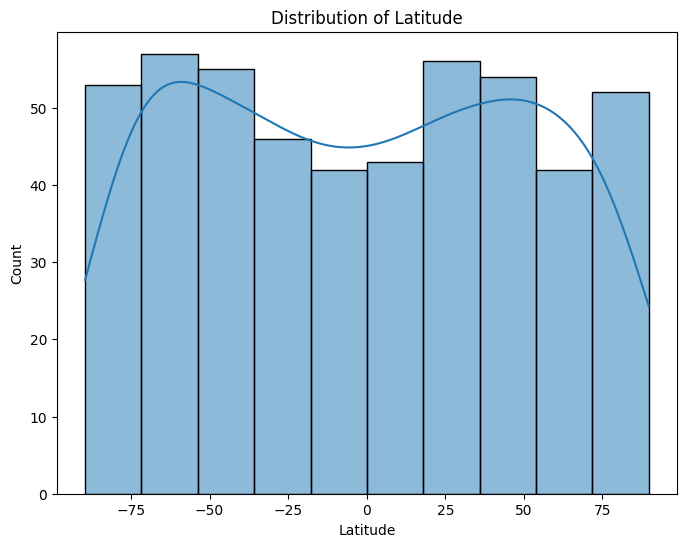

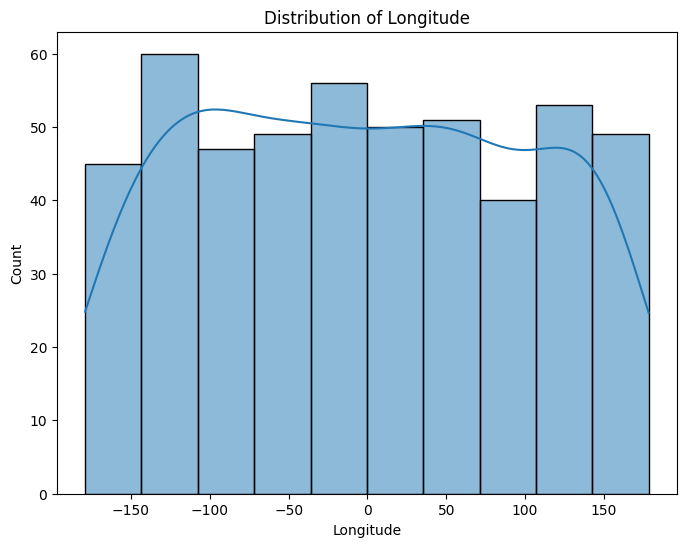

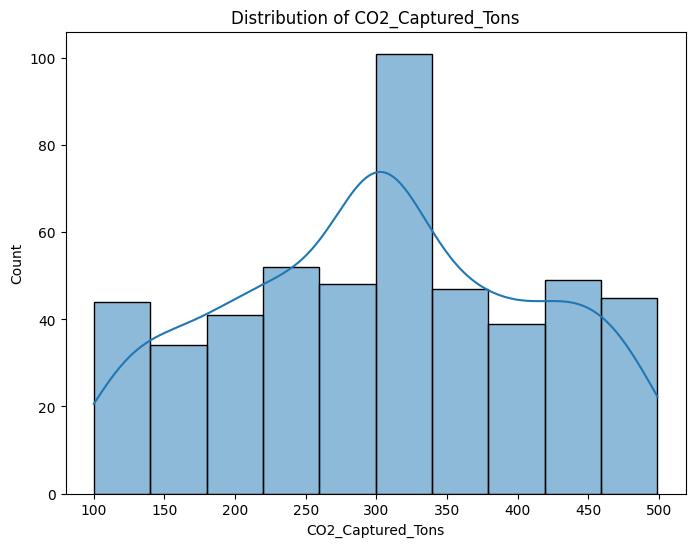

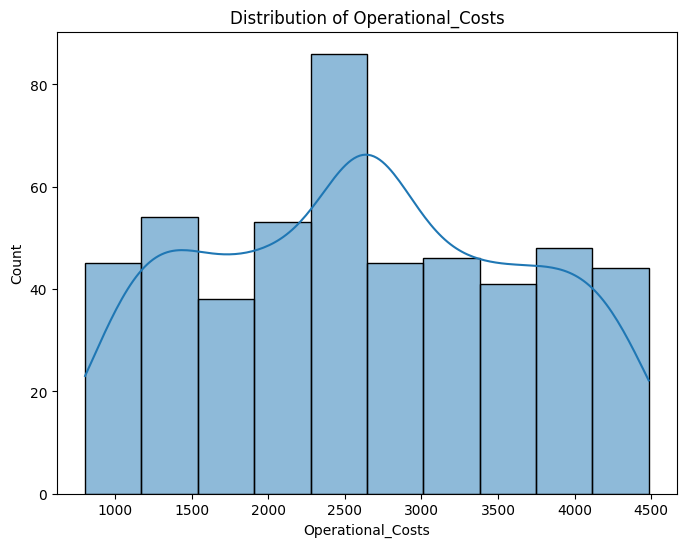

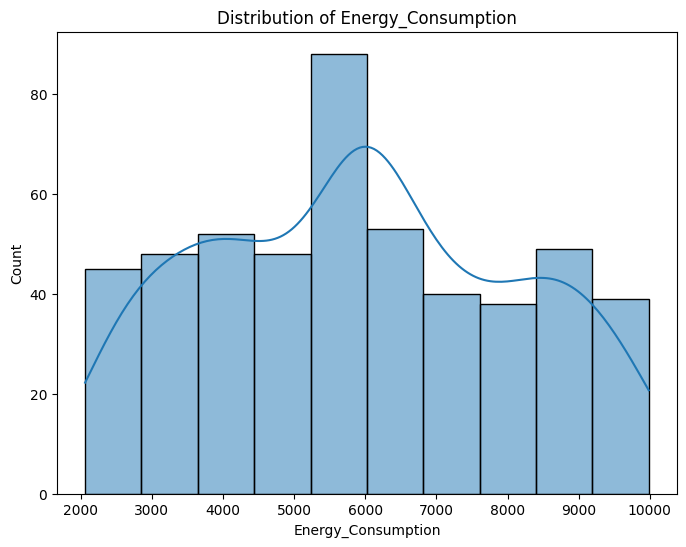

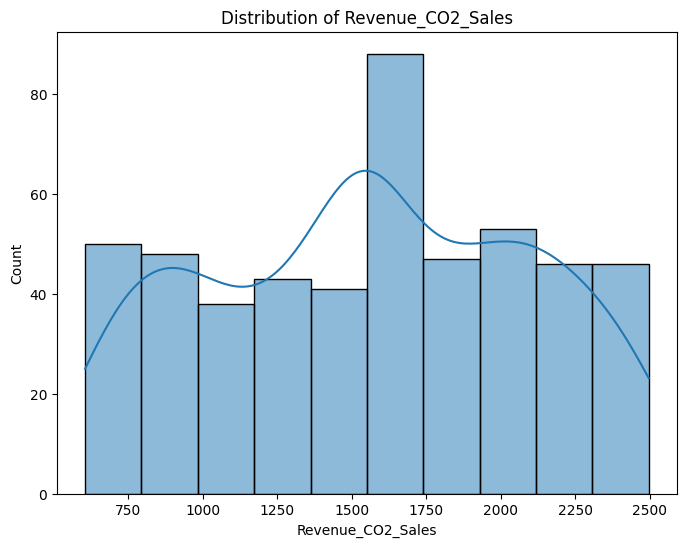

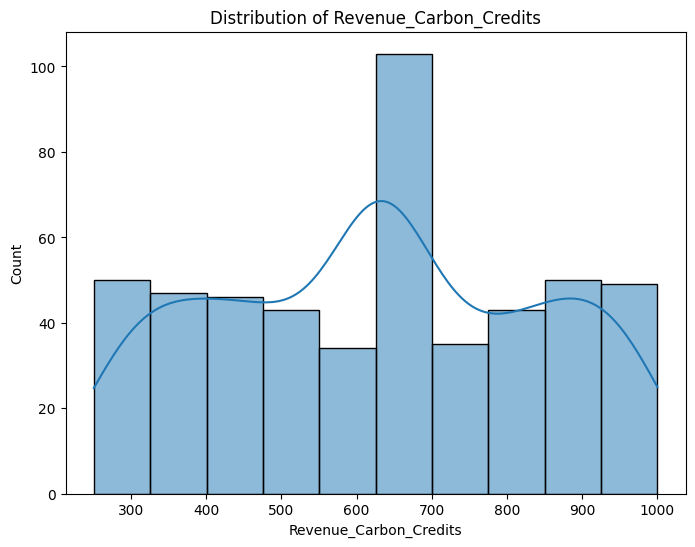

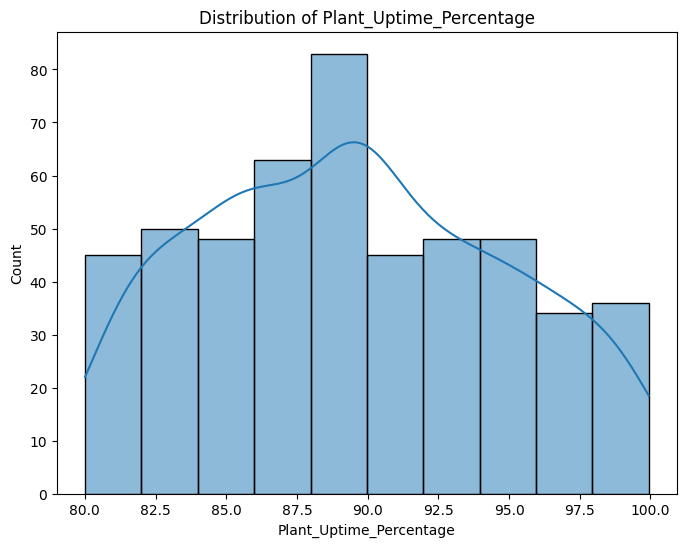

In [30]:
# Histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


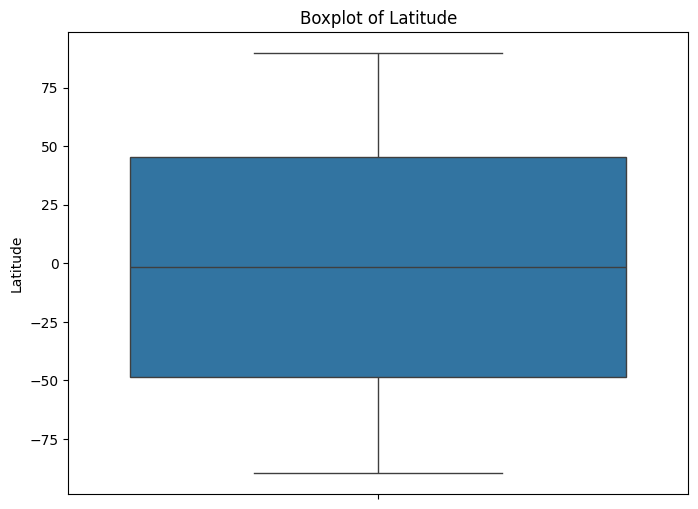

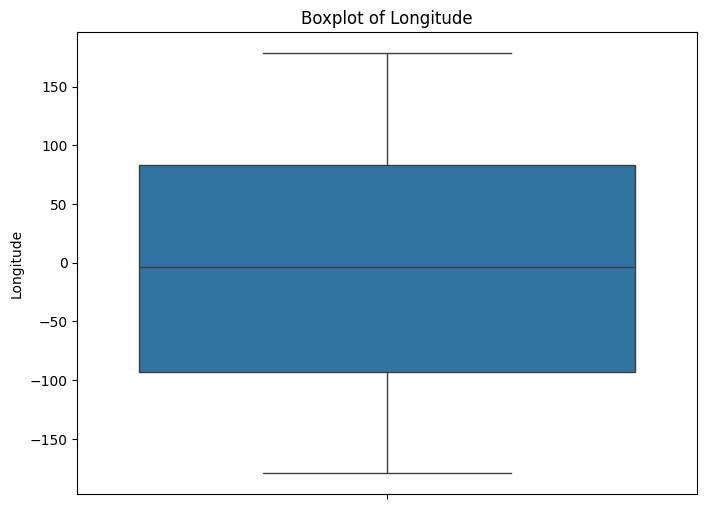

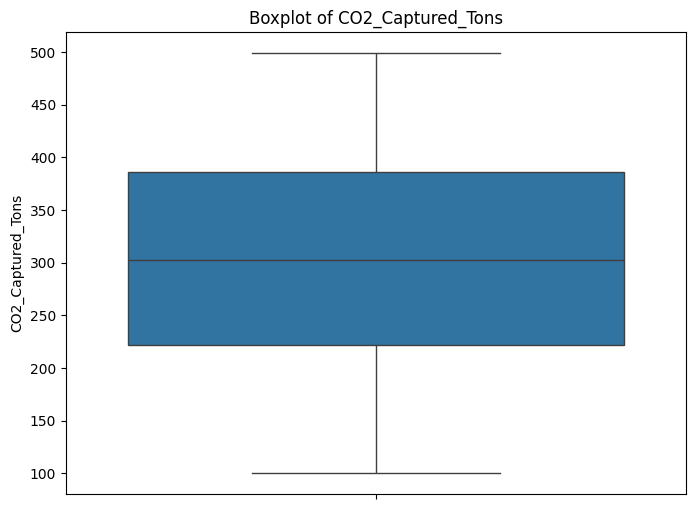

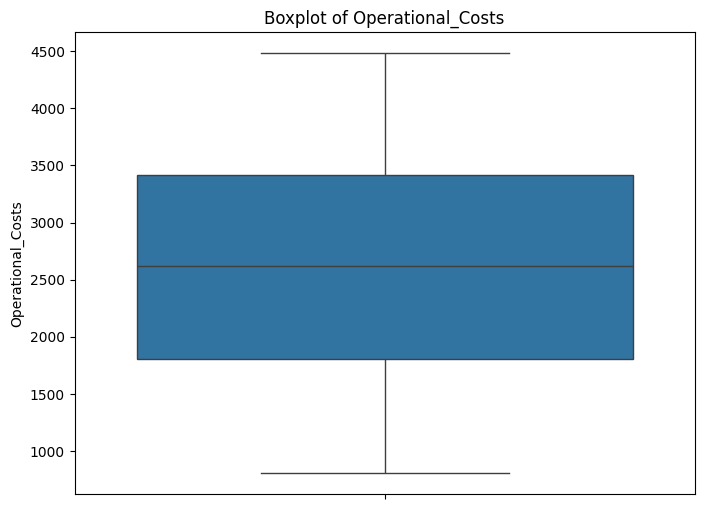

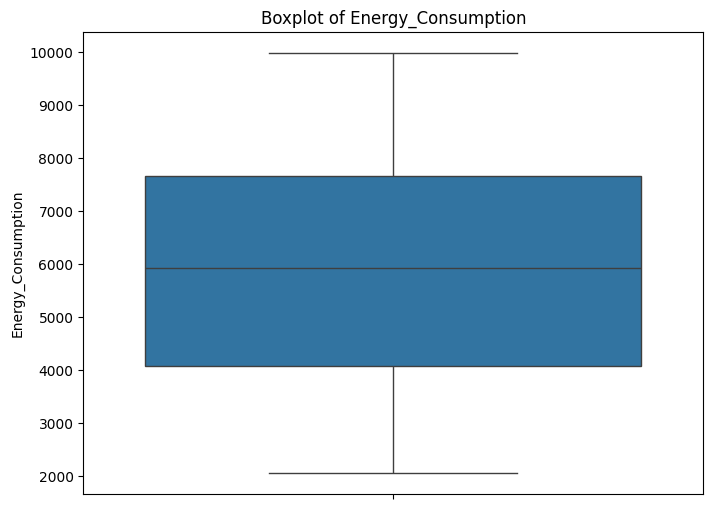

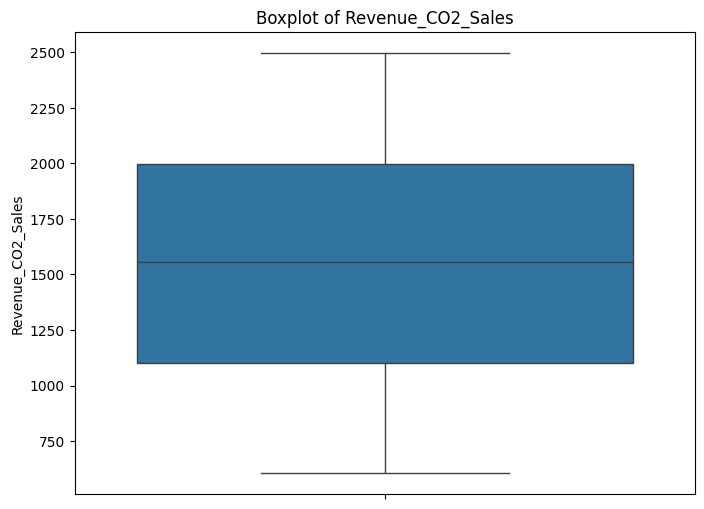

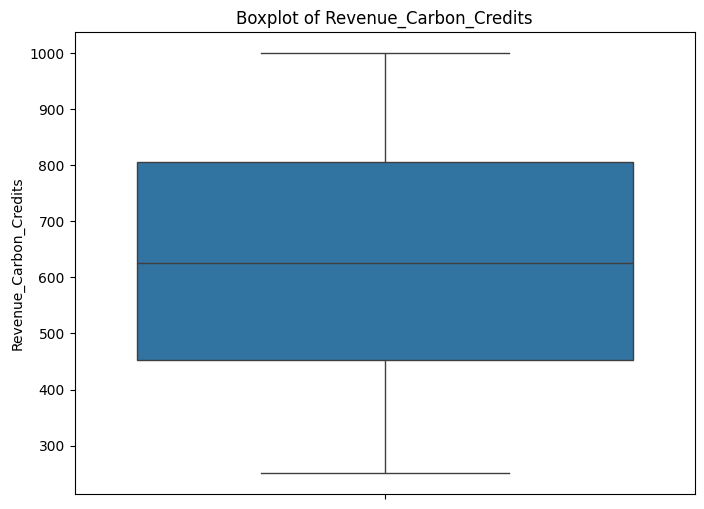

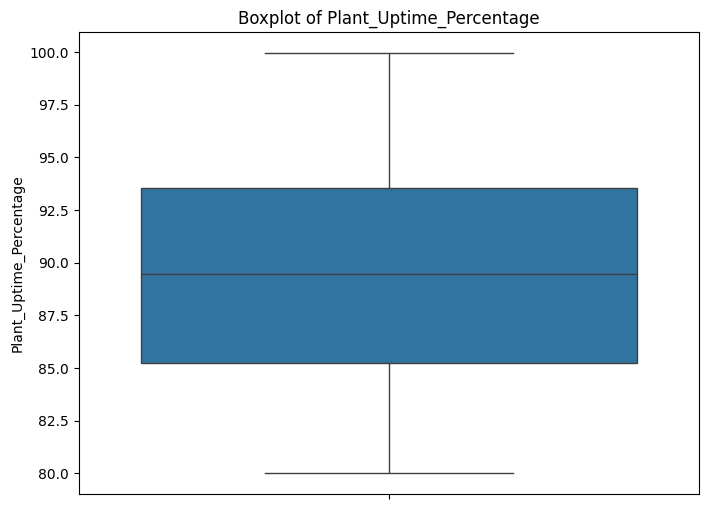

In [31]:
# Boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# 4. Trend and Comparative Analysis

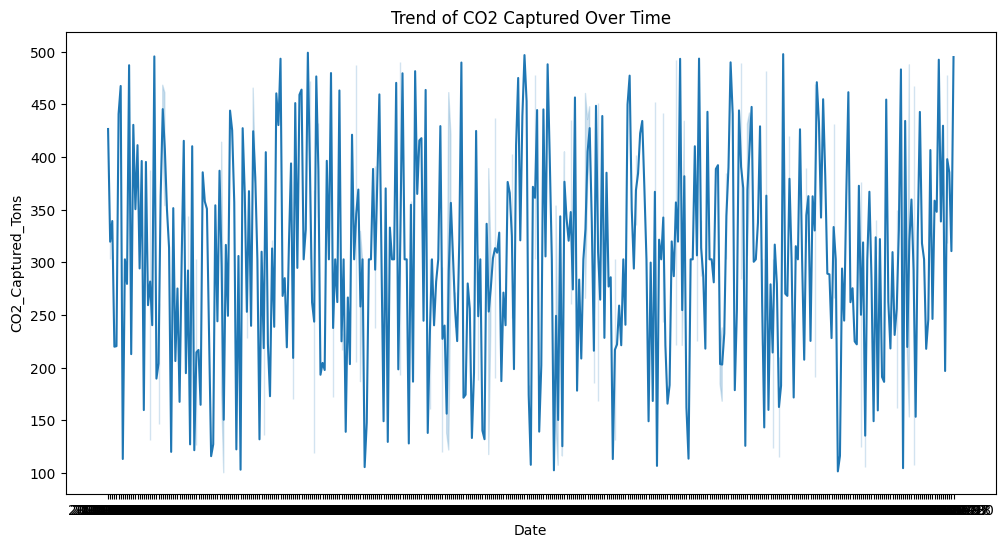

In [32]:
# Line plots for trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='CO2_Captured_Tons', data=df, estimator=np.mean)
plt.title('Trend of CO2 Captured Over Time')
plt.show()

In [33]:
trend_over_time = df.groupby('Date')['CO2_Captured_Tons'].mean()
print("\nTrend of CO2 Captured Over Time:")
print(trend_over_time)


Trend of CO2 Captured Over Time:
Date
2022-01-01    426.590000
2022-01-02    319.540211
2022-01-06    339.170000
2022-01-10    219.770000
2022-01-18    220.310000
                 ...    
2024-12-22    196.700000
2024-12-23    397.930000
2024-12-27    385.410000
2024-12-28    310.590000
2024-12-30    494.940000
Name: CO2_Captured_Tons, Length: 403, dtype: float64


In [34]:
# Mean CO2 Captured by Site
mean_co2_by_site = df.groupby('Site_ID')['CO2_Captured_Tons'].mean()
print("\nMean CO2 Captured by Site:")
print(mean_co2_by_site)


Mean CO2 Captured by Site:
Site_ID
Site_1    298.480211
Site_2    305.391944
Site_3    314.294051
Site_4    292.528493
Name: CO2_Captured_Tons, dtype: float64


In [35]:
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         Latitude  Longitude  CO2_Captured_Tons  \
Latitude                 1.000000  -0.100089           0.042254   
Longitude               -0.100089   1.000000           0.016058   
CO2_Captured_Tons        0.042254   0.016058           1.000000   
Operational_Costs        0.031087  -0.087338          -0.062412   
Energy_Consumption      -0.052381  -0.051218           0.085925   
Revenue_CO2_Sales       -0.008681  -0.040648          -0.024292   
Revenue_Carbon_Credits   0.089643  -0.017642          -0.009905   
Plant_Uptime_Percentage -0.016566  -0.095603          -0.033908   

                         Operational_Costs  Energy_Consumption  \
Latitude                          0.031087           -0.052381   
Longitude                        -0.087338           -0.051218   
CO2_Captured_Tons                -0.062412            0.085925   
Operational_Costs                 1.000000           -0.015435   
Energy_Consumption               -0.015435   

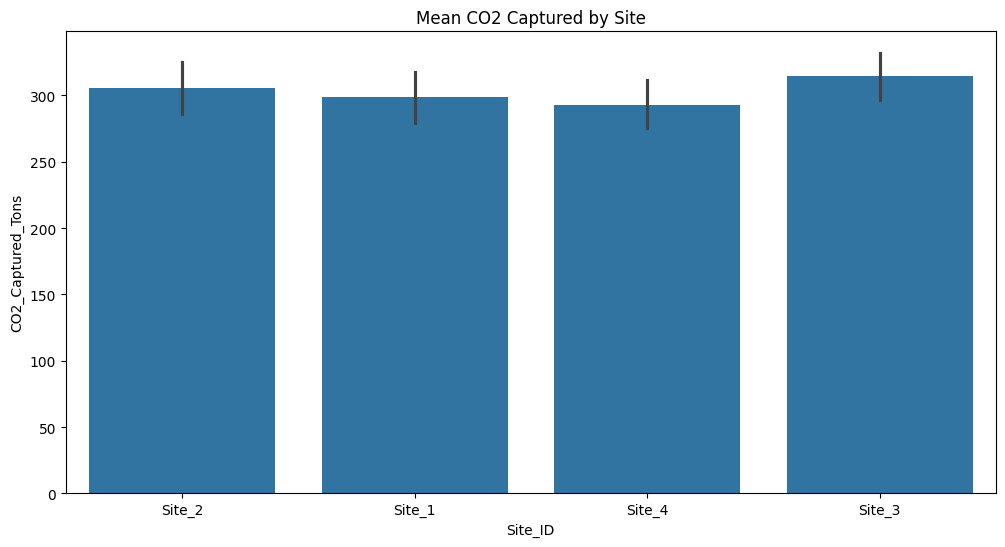

In [36]:
# Bar plots for site-wise comparisons
plt.figure(figsize=(12, 6))
sns.barplot(x='Site_ID', y='CO2_Captured_Tons', data=df, estimator=np.mean)
plt.title('Mean CO2 Captured by Site')
plt.show()


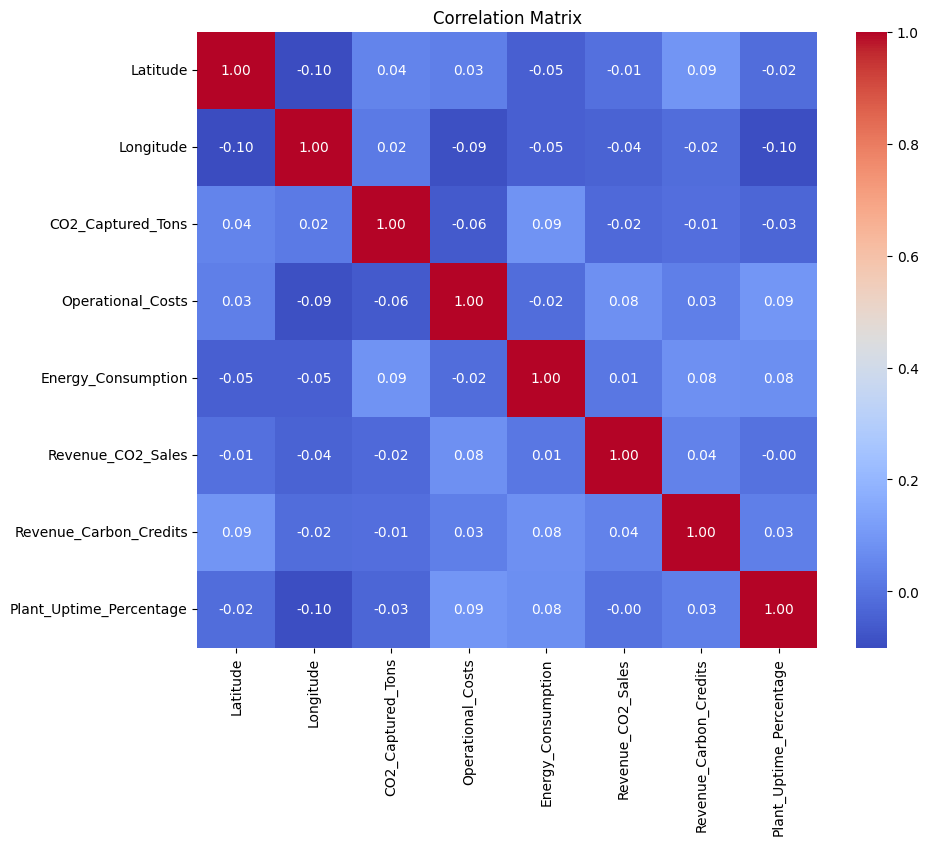

In [37]:
# Heatmap for correlation
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 5. Operational Efficiency Analysis

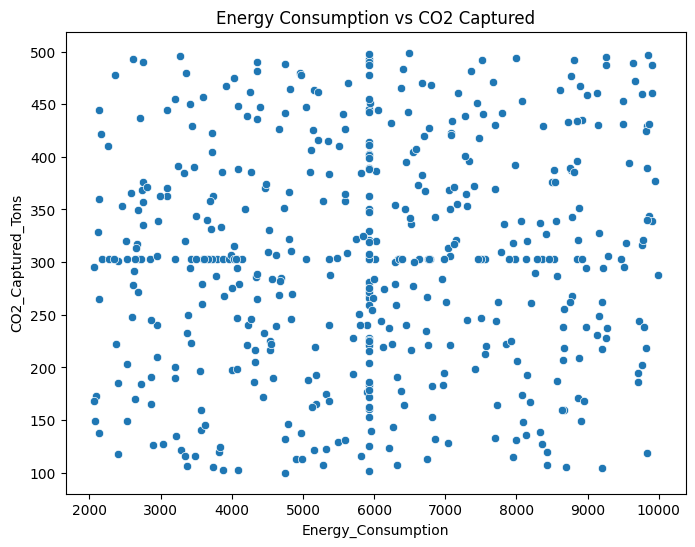

In [38]:
# Scatter plots for relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Energy_Consumption', y='CO2_Captured_Tons', data=df)
plt.title('Energy Consumption vs CO2 Captured')
plt.show()

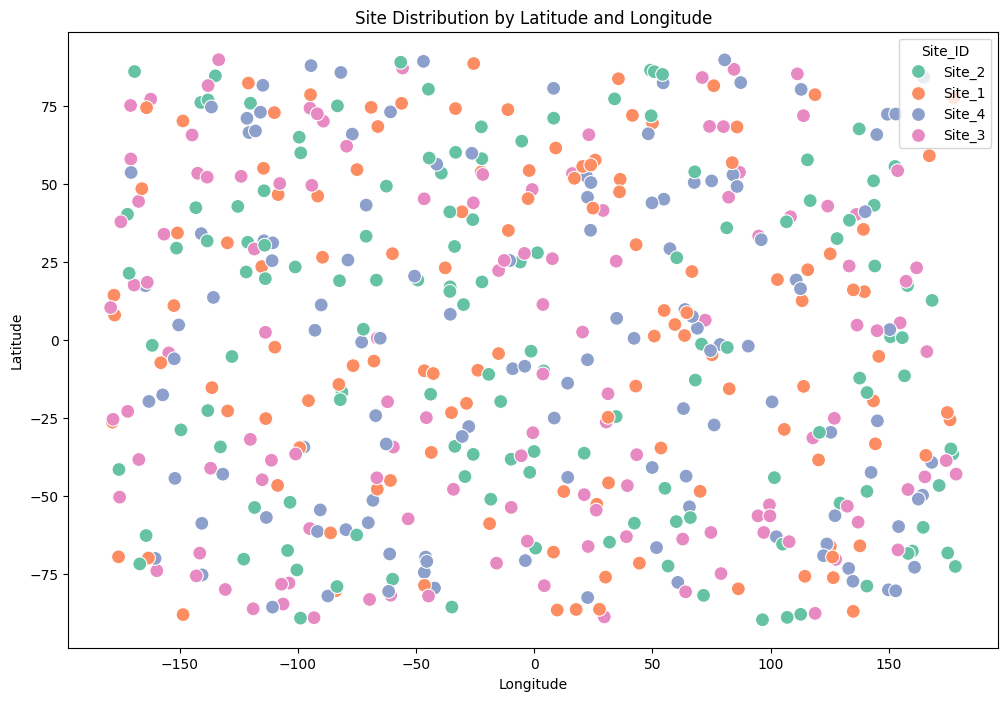

In [51]:
# Scatter plot for Latitude and Longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Site_ID', palette='Set2', s=100)
plt.title('Site Distribution by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



C:\Users\Kusal\AppData\Local\Temp\ipykernel_75672\3292960951.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Longitude', y='Latitude', data=df, cmap='coolwarm', shade=True, thresh=0.05)


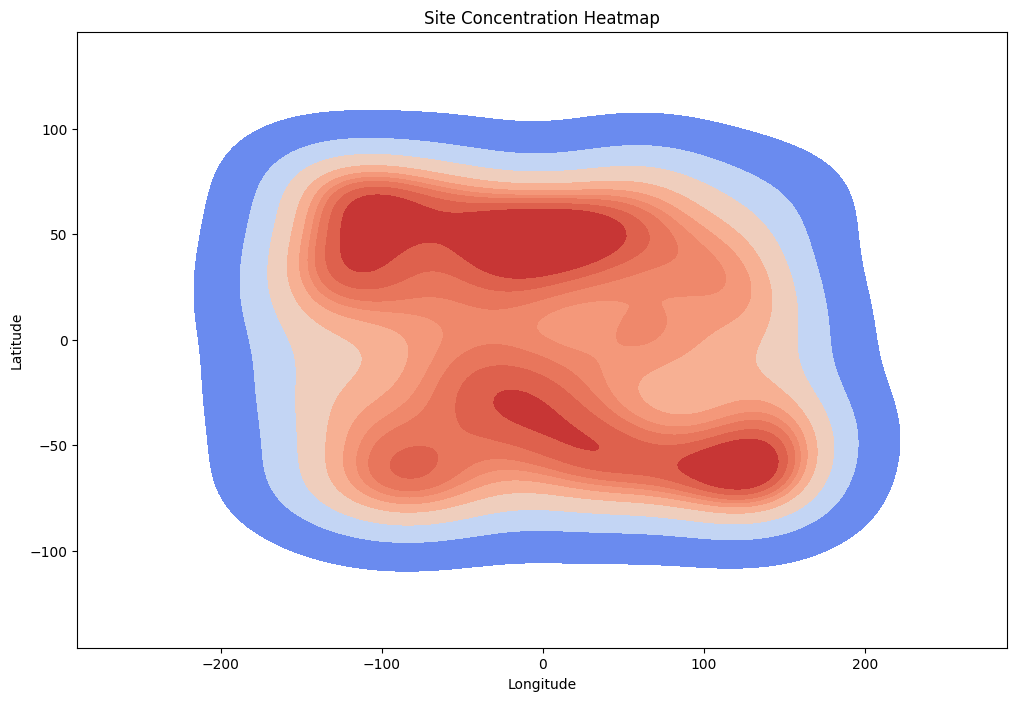

In [53]:
# 2D density plot for Site Concentration
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Longitude', y='Latitude', data=df, cmap='coolwarm', shade=True, thresh=0.05)
plt.title('Site Concentration Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# 6. Financial Performance Analysis

In [39]:
# ROI calculations
df['Net_Profit'] = df['Revenue_CO2_Sales'] + df['Revenue_Carbon_Credits'] - df['Operational_Costs']
df['ROI'] = (df['Net_Profit'] / df['Operational_Costs']) * 100

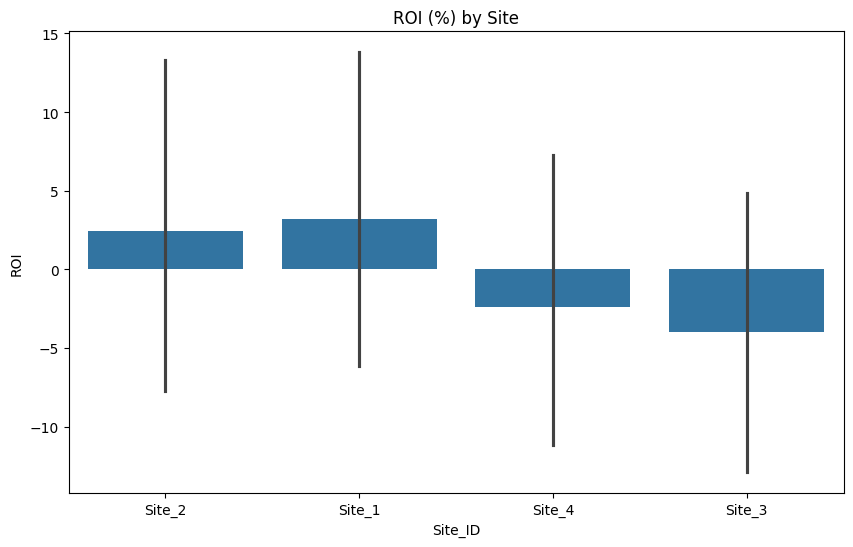

In [40]:
# ROI by Site
plt.figure(figsize=(10, 6))
sns.barplot(x='Site_ID', y='ROI', data=df, estimator=np.mean)
plt.title('ROI (%) by Site')
plt.show()

In [41]:
# Profit margin analysis
df['Profit_Margin'] = (df['Net_Profit'] / df[['Revenue_CO2_Sales', 'Revenue_Carbon_Credits']].sum(axis=1)) * 100


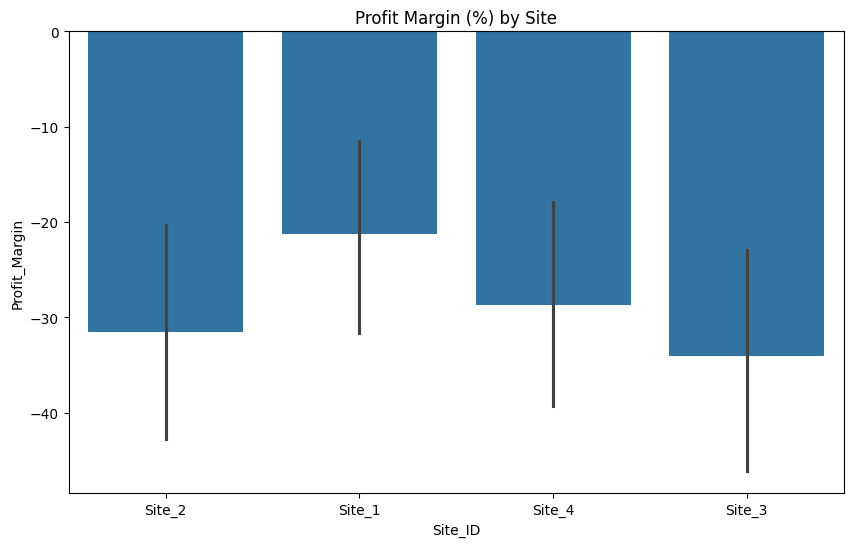

In [42]:
# Profit margin by Site
plt.figure(figsize=(10, 6))
sns.barplot(x='Site_ID', y='Profit_Margin', data=df, estimator=np.mean)
plt.title('Profit Margin (%) by Site')
plt.show()

In [43]:
# ROI and Profit Margin by Site
df['Net_Profit'] = df['Revenue_CO2_Sales'] + df['Revenue_Carbon_Credits'] - df['Operational_Costs']
df['ROI'] = (df['Net_Profit'] / df['Operational_Costs']) * 100
roi_by_site = df.groupby('Site_ID')['ROI'].mean()
print("\nROI (%) by Site:")
print(roi_by_site)


ROI (%) by Site:
Site_ID
Site_1    3.203039
Site_2    2.465484
Site_3   -3.960295
Site_4   -2.387571
Name: ROI, dtype: float64


In [44]:
df['Profit_Margin'] = (df['Net_Profit'] / df[['Revenue_CO2_Sales', 'Revenue_Carbon_Credits']].sum(axis=1)) * 100
profit_margin_by_site = df.groupby('Site_ID')['Profit_Margin'].mean()
print("\nProfit Margin (%) by Site:")
print(profit_margin_by_site)


Profit Margin (%) by Site:
Site_ID
Site_1   -21.299735
Site_2   -31.537918
Site_3   -34.051296
Site_4   -28.659689
Name: Profit_Margin, dtype: float64


# 7. Environmental Impact Assessment

In [45]:
# Total CO2 emissions reduced
total_co2_reduced = df['CO2_Captured_Tons'].sum()
print(f"Total CO2 emissions reduced across all sites: {total_co2_reduced} tons")

Total CO2 emissions reduced across all sites: 151390.2111111111 tons


In [46]:
# CO2 savings potential
avg_co2_per_kwh = df['CO2_Captured_Tons'].sum() / df['Energy_Consumption'].sum()
total_co2_savings = avg_co2_per_kwh * df['Energy_Consumption'].sum()
print(f"Total CO2 savings potential: {total_co2_savings} tons")

Total CO2 savings potential: 151390.2111111111 tons


# 8. Customer Satisfaction and Correlation Analysis

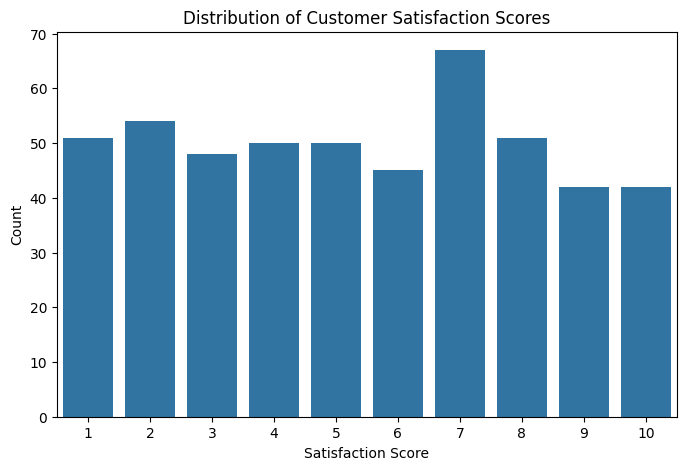

In [47]:
# Distribution of Customer_Satisfaction_Score
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer_Satisfaction_Score', data=df)
plt.title('Distribution of Customer Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.show()


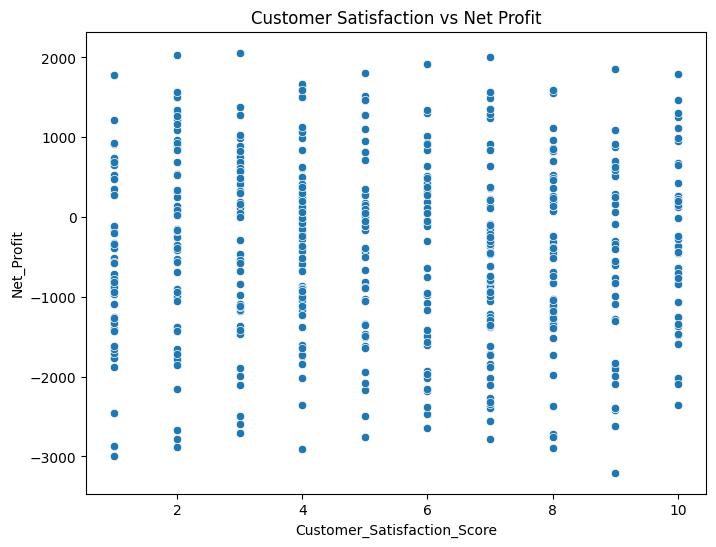

In [48]:
# Scatter plots to visualize relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customer_Satisfaction_Score', y='Net_Profit', data=df)
plt.title('Customer Satisfaction vs Net Profit')
plt.show()

In [49]:
# Distribution of Customer_Satisfaction_Score
satisfaction_distribution = df['Customer_Satisfaction_Score'].value_counts().sort_index()
print("\nDistribution of Customer Satisfaction Scores:")
print(satisfaction_distribution)


Distribution of Customer Satisfaction Scores:
Customer_Satisfaction_Score
1     51
2     54
3     48
4     50
5     50
6     45
7     67
8     51
9     42
10    42
Name: count, dtype: int64


In [50]:
# Customer Satisfaction vs Net Profit
correlation_satisfaction_profit = df['Customer_Satisfaction_Score'].corr(df['Net_Profit'])
print(f"\nCorrelation between Customer Satisfaction and Net Profit: {correlation_satisfaction_profit}")


Correlation between Customer Satisfaction and Net Profit: -0.027958886578608334
